In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

2024-04-24 02:41:42.701081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])

# Create lagged features for one-step ahead prediction
df['HARE_lag1'] = df['HARE'].shift(1)
df['LYNX_lag1'] = df['LYNX'].shift(1)

df.dropna(inplace=True)

# Define features (x) and targets (y)
x = df[['HARE_lag1', 'LYNX_lag1']].values  # previous time step's data as input
y = df[['HARE', 'LYNX']].values  
print(df)

    DATE   HARE   LYNX  HARE_lag1  LYNX_lag1
1   1846  19.60  45.15      19.58      30.09
2   1847  19.61  49.15      19.60      45.15
3   1848  11.99  39.52      19.61      49.15
4   1849  28.04  21.23      11.99      39.52
5   1850  58.00   8.42      28.04      21.23
..   ...    ...    ...        ...        ...
86  1931  19.52   8.31       4.23       6.98
87  1932  82.11  16.01      19.52       8.31
88  1933  89.76  24.82      82.11      16.01
89  1934  81.66  29.70      89.76      24.82
90  1935  15.76  35.40      81.66      29.70

[90 rows x 5 columns]


In [3]:
split_idx = int(len(x) * 0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [4]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

In [5]:
model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error')

mae_model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(2)
])
mae_model.compile(optimizer='adam', loss='mean_absolute_error')

Epoch 1/200, Training MSE: 1.0085, Test MSE: 0.8872
Epoch 2/200, Training MSE: 1.0076, Test MSE: 0.8854
Epoch 3/200, Training MSE: 1.0079, Test MSE: 0.8841
Epoch 4/200, Training MSE: 1.0058, Test MSE: 0.8829
Epoch 5/200, Training MSE: 1.0073, Test MSE: 0.8822
Epoch 6/200, Training MSE: 1.0078, Test MSE: 0.8819
Epoch 7/200, Training MSE: 1.0034, Test MSE: 0.8813
Epoch 8/200, Training MSE: 1.0051, Test MSE: 0.8804
Epoch 9/200, Training MSE: 1.0041, Test MSE: 0.8794
Epoch 10/200, Training MSE: 1.0041, Test MSE: 0.8786
Epoch 11/200, Training MSE: 1.0044, Test MSE: 0.8777
Epoch 12/200, Training MSE: 1.0011, Test MSE: 0.8769
Epoch 13/200, Training MSE: 1.0042, Test MSE: 0.8761
Epoch 14/200, Training MSE: 1.0051, Test MSE: 0.8752
Epoch 15/200, Training MSE: 1.0027, Test MSE: 0.8742
Epoch 16/200, Training MSE: 1.0036, Test MSE: 0.8734
Epoch 17/200, Training MSE: 1.0019, Test MSE: 0.8728
Epoch 18/200, Training MSE: 1.0016, Test MSE: 0.8724
Epoch 19/200, Training MSE: 1.0017, Test MSE: 0.8721
Ep

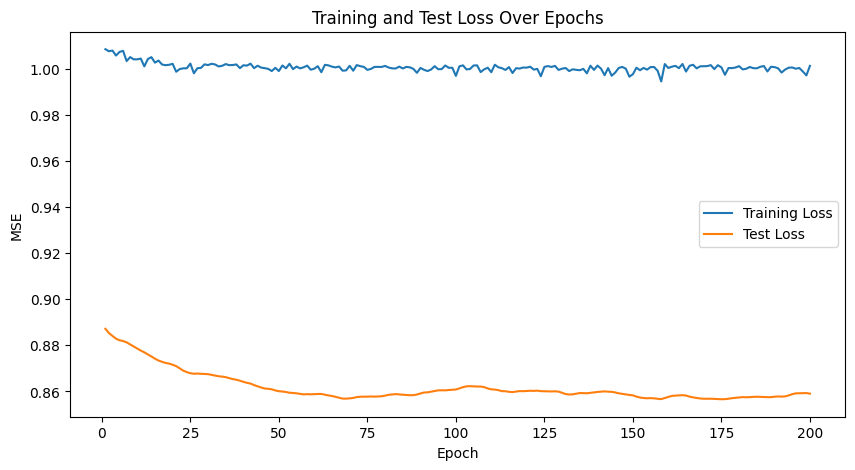

Final Test MSE: 0.8590297102928162
Final Test RMSE: 0.9268385567577647
Final Test MAE: 0.8282983303070068


In [6]:
epochs = 200
train_losses = []
test_losses = []

rmse_test = 0
mae_test = 0

for epoch in range(epochs):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)
        
    mae_hist = mae_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)

    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

    mae_test = mae_hist.history['loss'][-1]

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
rmse_test = np.sqrt(final_mse_test)
print(f'Final Test MSE: {final_mse_test}')
print(f'Final Test RMSE: {rmse_test}')
print(f'Final Test MAE: {mae_test}')

In [7]:
df = pd.read_csv('../../Datasets/study_373/top_5_373_linear.csv', usecols=['46670', '46982', '46504', '46571', '46888'])
"""
46670  [Nyctereutes procyonoides]     Common Raccoon Dog      -> Rodents, Japanese Hare
46982  [Sus scrofa]				      Wild Boar               -> Rodents, Japanese Hare
46504  [Lepus brachyurus]			  Japanese Hare
46571  [Meles anakuma]			      Japanese Badger         -> Rodents
46888  [Rodentia]
"""

for col in ['46670', '46982', '46504', '46571', '46888']:
    df[f'{col}_lag1'] = df[col].shift(1)
df.dropna(inplace=True)

# Define features (x) and targets (y)
x = df[['46670_lag1', '46982_lag1', '46504_lag1', '46571_lag1', '46888_lag1']].values  # previous time step's data as input
y = df[['46670', '46982', '46504', '46571', '46888']].values  
print(df)

         46670     46982  46504  46571  46888  46670_lag1  46982_lag1  \
1     1.000000  2.030303    1.0    1.0    2.0    1.000000    2.000000   
2     1.000000  2.060606    1.0    1.0    2.0    1.000000    2.030303   
3     1.000000  2.090909    1.0    1.0    2.0    1.000000    2.060606   
4     1.000000  2.121212    1.0    1.0    2.0    1.000000    2.090909   
5     1.000000  2.151515    1.0    1.0    2.0    1.000000    2.121212   
...        ...       ...    ...    ...    ...         ...         ...   
1611  2.272727  5.363636    1.0    1.0    2.0    2.363636    4.818182   
1612  2.181818  5.909091    1.0    1.0    2.0    2.272727    5.363636   
1613  2.090909  6.454545    1.0    1.0    2.0    2.181818    5.909091   
1614  2.000000  7.000000    1.0    1.0    2.0    2.090909    6.454545   
1615  2.000000  1.000000    1.0    1.0    1.0    2.000000    7.000000   

      46504_lag1  46571_lag1  46888_lag1  
1            1.0         1.0         2.0  
2            1.0         1.0         

In [8]:
split_idx = int(len(x) * 0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [9]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

In [12]:
model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(5)
])

model.compile(optimizer='adam', loss='mean_squared_error')


mae_model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(5)
])
mae_model.compile(optimizer='adam', loss='mean_absolute_error')

Epoch 1/200, Training MSE: 1.0065, Test MSE: 0.9418
Epoch 2/200, Training MSE: 1.0031, Test MSE: 0.9319
Epoch 3/200, Training MSE: 1.0022, Test MSE: 0.9266
Epoch 4/200, Training MSE: 1.0013, Test MSE: 0.9227
Epoch 5/200, Training MSE: 1.0011, Test MSE: 0.9216
Epoch 6/200, Training MSE: 1.0010, Test MSE: 0.9199
Epoch 7/200, Training MSE: 1.0008, Test MSE: 0.9188
Epoch 8/200, Training MSE: 1.0005, Test MSE: 0.9184
Epoch 9/200, Training MSE: 1.0002, Test MSE: 0.9180
Epoch 10/200, Training MSE: 1.0005, Test MSE: 0.9165
Epoch 11/200, Training MSE: 1.0002, Test MSE: 0.9168
Epoch 12/200, Training MSE: 1.0000, Test MSE: 0.9172
Epoch 13/200, Training MSE: 1.0004, Test MSE: 0.9171
Epoch 14/200, Training MSE: 1.0003, Test MSE: 0.9159
Epoch 15/200, Training MSE: 0.9999, Test MSE: 0.9167
Epoch 16/200, Training MSE: 0.9999, Test MSE: 0.9158
Epoch 17/200, Training MSE: 1.0000, Test MSE: 0.9150
Epoch 18/200, Training MSE: 0.9999, Test MSE: 0.9165
Epoch 19/200, Training MSE: 1.0000, Test MSE: 0.9162
Ep

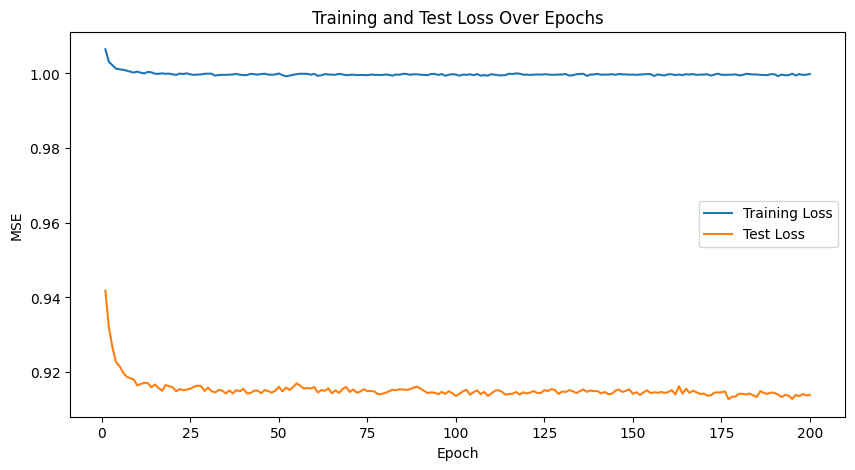

Final Test MSE: 0.9139218926429749
Final Test RMSE: 0.9559926216467232
Final Test MAE: 0.6646597981452942


In [13]:
epochs = 200
train_losses = []
test_losses = []

rmse_test = 0
mae_test = 0

for epoch in range(epochs):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)
        
    mae_hist = mae_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)

    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

    mae_test = mae_hist.history['loss'][-1]

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
rmse_test = np.sqrt(final_mse_test)
print(f'Final Test MSE: {final_mse_test}')
print(f'Final Test RMSE: {rmse_test}')
print(f'Final Test MAE: {mae_test}')

In [16]:
df = pd.read_csv('../../Datasets/study_213/top_5_213_linear.csv', usecols=['7058', '8572', '39601', '8901', '7730'])
"""
7058 ['Merluccius bilinearis']  Silver hake             -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
8572 ['Squalus acanthias']      Spiny dogfish           -> Silver hake, Spiny dogfish, Longfin inshore squid, Red hake, American butterfish
39601 ['Doryteuthis pealeii']   Longfin inshore squid   -> Silver hake, Longfin inshore squid
8901 ['Urophycis chuss']        Red hake                -> Silver hake, Longfin inshore squid, Red hake, American butterfish
7730 ['Peprilus triacanthus']   American butterfish     -> Longfin inshore squid
"""

for col in ['7058', '8572', '39601', '8901', '7730']:
    df[f'{col}_lag1'] = df[col].shift(1)
df.dropna(inplace=True)

# Define features (x) and targets (y)
x = df[['7058_lag1', '8572_lag1', '39601_lag1', '8901_lag1', '7730_lag1']].values  # previous time step's data as input
y = df[['7058', '8572', '39601', '8901', '7730']].values  
print(df)

              7058        8572       39601        8901       7730  \
1      1488.923077  409.384615   18.923077  161.423077   1.961538   
2      1446.846154  396.769231   18.846154  158.846154   1.923077   
3      1404.769231  384.153846   18.769231  156.269231   1.884615   
4      1362.692308  371.538462   18.692308  153.692308   1.846154   
5      1320.615385  358.923077   18.615385  151.115385   1.807692   
...            ...         ...         ...         ...        ...   
16427   732.000000  468.000000   32.000000  186.000000   1.000000   
16428   568.500000  351.750000  141.750000  139.750000   4.250000   
16429   405.000000  235.500000  251.500000   93.500000   7.500000   
16430   241.500000  119.250000  361.250000   47.250000  10.750000   
16431    78.000000    3.000000  471.000000    1.000000  14.000000   

         7058_lag1   8572_lag1  39601_lag1   8901_lag1  7730_lag1  
1      1531.000000  422.000000   19.000000  164.000000   2.000000  
2      1488.923077  409.384615   18

In [17]:
split_idx = int(len(x) * 0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [18]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

y_train = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))
y_test = y_test.reshape((y_test.shape[0], 1, y_test.shape[1]))

In [19]:
model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(5)
])

model.compile(optimizer='adam', loss='mean_squared_error')

mae_model = Sequential([
    LSTM(10, activation='relu', input_shape=(1, x_train.shape[2])),
    Dense(5)
])
mae_model.compile(optimizer='adam', loss='mean_absolute_error')

Epoch 1/200, Training MSE: 1.0032, Test MSE: 1.3554
Epoch 2/200, Training MSE: 1.0000, Test MSE: 1.3446
Epoch 3/200, Training MSE: 0.9997, Test MSE: 1.3476
Epoch 4/200, Training MSE: 0.9997, Test MSE: 1.3451
Epoch 5/200, Training MSE: 0.9996, Test MSE: 1.3413
Epoch 6/200, Training MSE: 0.9995, Test MSE: 1.3432
Epoch 7/200, Training MSE: 0.9993, Test MSE: 1.3257
Epoch 8/200, Training MSE: 0.9995, Test MSE: 1.3281
Epoch 9/200, Training MSE: 0.9995, Test MSE: 1.3264
Epoch 10/200, Training MSE: 0.9995, Test MSE: 1.3293
Epoch 11/200, Training MSE: 0.9995, Test MSE: 1.3339
Epoch 12/200, Training MSE: 0.9994, Test MSE: 1.3342
Epoch 13/200, Training MSE: 0.9994, Test MSE: 1.3339
Epoch 14/200, Training MSE: 0.9995, Test MSE: 1.3354
Epoch 15/200, Training MSE: 0.9994, Test MSE: 1.3369
Epoch 16/200, Training MSE: 0.9994, Test MSE: 1.3297
Epoch 17/200, Training MSE: 0.9994, Test MSE: 1.3351
Epoch 18/200, Training MSE: 0.9993, Test MSE: 1.3298
Epoch 19/200, Training MSE: 0.9995, Test MSE: 1.3373
Ep

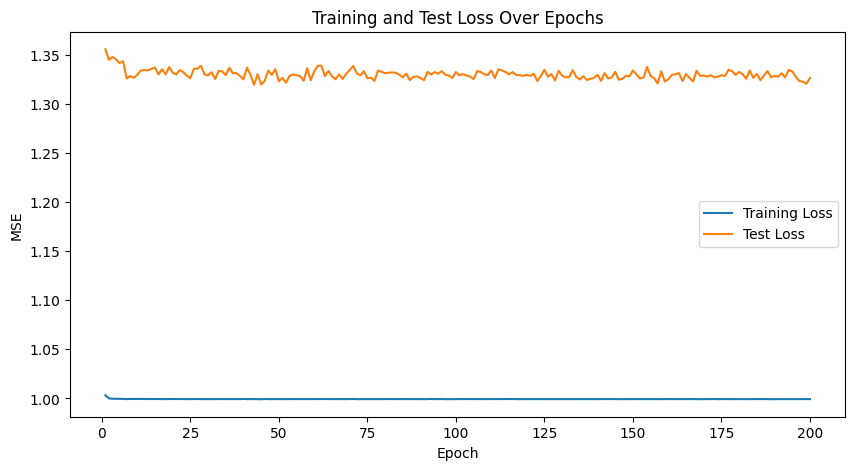

Final Test MSE: 1.3260399103164673
Final Test RMSE: 1.1515380629039005
Final Test MAE: 0.43427810072898865


In [20]:
epochs = 200
train_losses = []
test_losses = []

rmse_test = 0
mae_test = 0

for epoch in range(epochs):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)
        
    mae_hist = mae_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)

    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

    mae_test = mae_hist.history['loss'][-1]

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
rmse_test = np.sqrt(final_mse_test)
print(f'Final Test MSE: {final_mse_test}')
print(f'Final Test RMSE: {rmse_test}')
print(f'Final Test MAE: {mae_test}')